# Součin náhodných proměnných 
### 1. Teoretické odvození

Mějme náhodnou veličinu $Y$, která vznikne jako součin $N$ nezávislých kladných náhodných proměnných $x_i$:

$$
Y = \prod_{i=1}^{N} x_i = x_1 \cdot x_2 \cdot \ldots \cdot x_N
$$

Abychom mohli aplikovat klasickou Centrální limitní větu (CLT), která platí pro součty, aplikujeme na obě strany rovnice přirozený logaritmus. Díky vlastnosti logaritmu ($\ln(a \cdot b) = \ln(a) + \ln(b)$) převedeme součin na součet:

$$
\ln(Y) = \ln\left( \prod_{i=1}^{N} x_i \right) = \sum_{i=1}^{N} \ln(x_i)
$$

Označme $z_i = \ln(x_i)$. Nyní máme novou náhodnou veličinu $Z$, která je součtem nezávislých proměnných:

$$
Z = \ln(Y) = \sum_{i=1}^{N} z_i
$$

Podle **Centrální limitní věty** (pro $N \to \infty$) má součet $Z$ **Normální (Gaussovo) rozdělení**:

$$
Z \sim \mathcal{N}(\mu, \sigma^2)
$$

Pokud má logaritmus veličiny $Y$ normální rozdělení, pak samotná veličina $Y$ má ze své definice **Lognormální rozdělení**, které jsme odvozovali v předchozím bonusovém úkolu:

$$
Y = e^Z \quad \text{kde} \quad Z \sim \mathcal{N}(\mu, \sigma^2)
$$

---

*   **Graf 1: Rozdělení součinu $Y$**
    *   Zobrazuje histogram hodnot $y = x_1 \cdot \ldots \cdot x_N$.
    *   Červená křivka představuje fit **Lognormálního rozdělení**. 
*   **Graf 2: Rozdělení logaritmu součinu $\ln(Y)$**
    *   Zobrazuje histogram hodnot po zlogaritmování výsledného součinu.
    *   Očekáváme **Gaussovu křivku** 

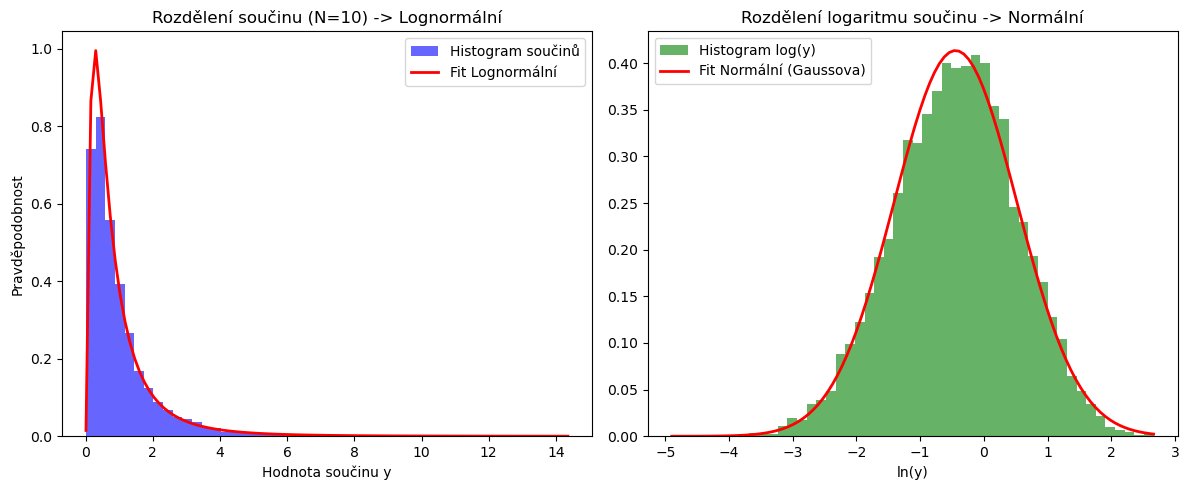

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# Nastavení parametrů
pocet_pokusu = 10000   
N = 10                 

# 1. Generování dat
# Když použijeme 0 až 1 půjde to do nuly, proto generujeme čísla v intervalu 0.5 až 1.5
data = np.random.uniform(0.5, 1.5, (pocet_pokusu, N))

# 2. Výpočet součinu (pro každý řádek vynásobíme všech N čísel)
soucin_y = np.prod(data, axis=1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(soucin_y, bins=50, density=True, alpha=0.6, color='blue', label='Histogram součinů')
plt.title(f'Rozdělení součinu (N={N}) -> Lognormální')
plt.xlabel('Hodnota součinu y')
plt.ylabel('Pravděpodobnost')

# Proložení teoretickou křivkou (fitování lognormálního rozdělení)
shape, loc, scale = lognorm.fit(soucin_y)
x_axis = np.linspace(min(soucin_y), max(soucin_y), 100)
pdf = lognorm.pdf(x_axis, shape, loc, scale)
plt.plot(x_axis, pdf, 'r-', lw=2, label='Fit Lognormální')
plt.legend()

# --- Graf B: Rozdělení logaritmu součinu (Mělo by být Normální) ---
plt.subplot(1, 2, 2)
log_y = np.log(soucin_y)
plt.hist(log_y, bins=50, density=True, alpha=0.6, color='green', label='Histogram log(y)')
plt.title(f'Rozdělení logaritmu součinu -> Normální')
plt.xlabel('ln(y)')

# Proložení Gaussovou křivkou
mu, std = norm.fit(log_y)
x_axis_log = np.linspace(min(log_y), max(log_y), 100)
pdf_log = norm.pdf(x_axis_log, mu, std)
plt.plot(x_axis_log, pdf_log, 'r-', lw=2, label='Fit Normální (Gaussova)')
plt.legend()

plt.tight_layout()
plt.show()